## Êï∞ÊçÆÊ∏ÖÊ¥ó

In [21]:
#ÂÖàÂØºÂÖ•ÈúÄË¶ÅÁöÑÂ∫ì
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
#ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv('./data/sh600132.csv')
 
#Êü•ÁúãÊèèËø∞ÁªüËÆ°
df.describe().style.background_gradient(cmap = 'Oranges')

## Ê∑ªÂä†ËÇ°Á•®ÊåáÊ†á

#### MADC

In [22]:
# ËÆ°ÁÆó12Êó•EMAÂíå26Êó•EMA
df["EMA12"] = df["close"].ewm(span=12, adjust=False).mean()
df["EMA26"] = df["close"].ewm(span=26, adjust=False).mean()

# ËÆ°ÁÆó DIFÔºàÂø´Á∫øÔºâ
df["DIF"] = df["EMA12"] - df["EMA26"]

# ËÆ°ÁÆó DEAÔºàÊÖ¢Á∫øÔºâÔºåÂç≥ DIF ÁöÑ 9 Êó• EMA
df["DEA"] = df["DIF"].ewm(span=9, adjust=False).mean()

# ËÆ°ÁÆó MACD Áõ¥ÊñπÂõæ
df["MACD"] = 2 * (df["DIF"] - df["DEA"])

# Âà†Èô§‰∏≠Èó¥ËÆ°ÁÆóËøáÁ®ã‰∏≠ÁöÑÂàóÔºåÂè™‰øùÁïô MACD Âàó
df = df.drop(columns=["EMA12", "EMA26", "DIF", "DEA"])

# ÊòæÁ§∫ÁªìÊûú
print(df[["date", "close", "MACD"]].head())

         date  close      MACD
0  1997/10/30  12.12  0.000000
1  1997/10/31  11.32 -0.102108
2   1997/11/3  10.95 -0.207747
3   1997/11/4  11.12 -0.240665
4   1997/11/5  10.88 -0.278059


#### RSI

In [23]:
# ËÆ°ÁÆóÊØèÊó•Ê∂®Ë∑å
df["delta"] = df["close"].diff()

# ËÆ°ÁÆóÊ∂®Ë∑åÂπÖ (up / down)
df["up"] = df["delta"].apply(lambda x: x if x > 0 else 0)
df["down"] = df["delta"].apply(lambda x: -x if x < 0 else 0)

# ËÆ°ÁÆó 6 Êó•Âπ≥ÂùáÊ∂®Ë∑åÂπÖ
df["avg_up"] = df["up"].rolling(window=6).mean()
df["avg_down"] = df["down"].rolling(window=6).mean()

# ÈÅøÂÖçÈô§Èõ∂ÈîôËØØ
df["R6"] = df["avg_up"] / df["avg_down"].replace(0, 1)

# ËÆ°ÁÆó RSI6
df["RSI6"] = 100 - (100 / (1 + df["R6"]))

# Âà†Èô§‰∏≠Èó¥ËÆ°ÁÆóÂàóÔºåÂè™‰øùÁïô MACD Âíå RSI6
df = df.drop(columns=[ "delta", "up", "down", "avg_up", "avg_down", "R6"])

# ÊòæÁ§∫ÁªìÊûú
print(df[["date", "MACD", "RSI6"]][:10])

         date      MACD       RSI6
0  1997/10/30  0.000000        NaN
1  1997/10/31 -0.102108        NaN
2   1997/11/3 -0.207747        NaN
3   1997/11/4 -0.240665        NaN
4   1997/11/5 -0.278059        NaN
5   1997/11/6 -0.263334  19.428571
6   1997/11/7 -0.235259  20.338983
7  1997/11/10 -0.262293  25.000000
8  1997/11/11 -0.300156  26.277372
9  1997/11/12 -0.339583  12.837838


#### Ôº≠Ôº°

In [24]:
# ËÆ°ÁÆó 5 Êó•ÁßªÂä®Âπ≥ÂùáÁ∫ø (MA5)
df["MA5"] = df["close"].rolling(window=5, min_periods=1).mean()

# ËÆ°ÁÆó 10 Êó•ÁßªÂä®Âπ≥ÂùáÁ∫ø (MA10)
df["MA10"] = df["close"].rolling(window=10, min_periods=1).mean()

print(df[["date", "close", "MA5", "MA10"]].head(10))


         date  close        MA5       MA10
0  1997/10/30  12.12  12.120000  12.120000
1  1997/10/31  11.32  11.720000  11.720000
2   1997/11/3  10.95  11.463333  11.463333
3   1997/11/4  11.12  11.377500  11.377500
4   1997/11/5  10.88  11.278000  11.278000
5   1997/11/6  11.05  11.064000  11.240000
6   1997/11/7  11.07  11.014000  11.215714
7  1997/11/10  10.60  10.944000  11.138750
8  1997/11/11  10.30  10.780000  11.045556
9  1997/11/12  10.02  10.608000  10.943000


#### KDJ

In [25]:
# ËÆ°ÁÆó RSV9
df["lowest_9"] = df["low"].rolling(window=9, min_periods=1).min()
df["highest_9"] = df["high"].rolling(window=9, min_periods=1).max()
df["RSV9"] = (df["close"] - df["lowest_9"]) / (df["highest_9"] - df["lowest_9"]) * 100

# ÂàùÂßãÂåñ K Âíå D
df["K"] = 50
df["D"] = 50

# ËÆ°ÁÆó K, D, J
for i in range(1, len(df)):
    df.loc[i, "K"] = df.loc[i-1, "K"] * 2/3 + df.loc[i, "RSV9"] * 1/3
    df.loc[i, "D"] = df.loc[i-1, "D"] * 2/3 + df.loc[i, "K"] * 1/3

df["J"] = 3 * df["K"] - 2 * df["D"]

print(df[["date", "close", "K", "D", "J"]].head(10))

         date  close          K          D          J
0  1997/10/30  12.12  50.000000  50.000000  50.000000
1  1997/10/31  11.32  37.596899  45.865633  21.059432
2   1997/11/3  10.95  26.756647  39.495971   1.277999
3   1997/11/4  11.12  23.118293  34.036745   1.281388
4   1997/11/5  10.88  17.505593  28.526361  -4.535943
5   1997/11/6  11.05  16.501313  24.518012   0.467916
6   1997/11/7  11.07  16.153854  21.729959   5.001645
7  1997/11/10  10.60  12.067938  18.509285  -0.814758
8  1997/11/11  10.30  11.378625  16.132399   1.871078
9  1997/11/12  10.02   7.952050  13.405616  -2.955080


#### CCI

In [26]:
# ËÆ°ÁÆó CCIÔºàÈ°∫ÂäøÊåáÊ†áÔºâ
df["TP"] = (df["high"] + df["low"] + df["close"]) / 3  # ËÆ°ÁÆóÂÖ∏Âûã‰ª∑Ê†º
df["SMA_TP"] = df["TP"].rolling(window=14, min_periods=1).mean()  # 14Êó• TP ÂùáÂÄº
df["MAD_TP"] = df["TP"].rolling(window=14, min_periods=1).apply(lambda x: abs(x - x.mean()).mean(), raw=True)  # 14Êó•ÂÅèÂ∑ÆÁöÑÂùáÂÄº
df["CCI"] = (df["TP"] - df["SMA_TP"]) / (0.015 * df["MAD_TP"])

# Âà†Èô§‰∏≠Èó¥ËÆ°ÁÆóÂàóÔºåÂè™‰øùÁïôÊâÄÈúÄÂàó
df = df.drop(columns=["TP", "SMA_TP", "MAD_TP"])



print(df[["date", "close", "CCI"]].head(10))

         date  close         CCI
0  1997/10/30  12.12         NaN
1  1997/10/31  11.32  -66.666667
2   1997/11/3  10.95  -75.742574
3   1997/11/4  11.12  -62.982273
4   1997/11/5  10.88  -70.508397
5   1997/11/6  11.05  -52.777778
6   1997/11/7  11.07  -42.063821
7  1997/11/10  10.60  -89.442623
8  1997/11/11  10.30 -162.585034
9  1997/11/12  10.02 -151.795430


#### MTM

In [27]:
# ËÆ°ÁÆóÂä®ÈáèÊåáÊ†á MTM
df["MTM"] = df["close"] - df["close"].shift(6)

# ÊòæÁ§∫Ââç 10 Ë°åÊï∞ÊçÆ
print(df[["date", "close", "MTM"]].head(10))

         date  close   MTM
0  1997/10/30  12.12   NaN
1  1997/10/31  11.32   NaN
2   1997/11/3  10.95   NaN
3   1997/11/4  11.12   NaN
4   1997/11/5  10.88   NaN
5   1997/11/6  11.05   NaN
6   1997/11/7  11.07 -1.05
7  1997/11/10  10.60 -0.72
8  1997/11/11  10.30 -0.65
9  1997/11/12  10.02 -1.10


#### BIAS

In [28]:
# ËÆ°ÁÆó 12 Êó•ÁÆÄÂçïÁßªÂä®Âπ≥ÂùáÁ∫ø MA12
df["MA12"] = df["close"].rolling(window=12, min_periods=1).mean()

# ËÆ°ÁÆó‰πñÁ¶ªÁéá BIAS
df["BIAS"] = (df["close"] - df["MA12"]) / df["MA12"] * 100

df = df.drop(columns=["MA12"])

# ÊòæÁ§∫Ââç 10 Ë°åÊï∞ÊçÆ  
print(df[["date", "close", "BIAS"]].head(10))

         date  close      BIAS
0  1997/10/30  12.12  0.000000
1  1997/10/31  11.32 -3.412969
2   1997/11/3  10.95 -4.478046
3   1997/11/4  11.12 -2.263239
4   1997/11/5  10.88 -3.528995
5   1997/11/6  11.05 -1.690391
6   1997/11/7  11.07 -1.299198
7  1997/11/10  10.60 -4.836719
8  1997/11/11  10.30 -6.749824
9  1997/11/12  10.02 -8.434616


#### OBV

In [29]:
# ÂàùÂßãÂåñ OBV Âàó
df["OBV"] = 0

# ËÆ°ÁÆó OBV ÂÄº
for i in range(1, len(df)):
    if df.loc[i, "close"] > df.loc[i-1, "close"]:
        df.loc[i, "OBV"] = df.loc[i-1, "OBV"] + df.loc[i, "volume"]
    elif df.loc[i, "close"] < df.loc[i-1, "close"]:
        df.loc[i, "OBV"] = df.loc[i-1, "OBV"] - df.loc[i, "volume"]
    else:
        df.loc[i, "OBV"] = df.loc[i-1, "OBV"]

# ÊòæÁ§∫Ââç 10 Ë°åÊï∞ÊçÆ
print(df[["date", "close", "volume", "OBV"]].head(10))

         date  close    volume       OBV
0  1997/10/30  12.12  21455500         0
1  1997/10/31  11.32   7439800  -7439800
2   1997/11/3  10.95   2411000  -9850800
3   1997/11/4  11.12   2161300  -7689500
4   1997/11/5  10.88   2709900 -10399400
5   1997/11/6  11.05   2545700  -7853700
6   1997/11/7  11.07   2047400  -5806300
7  1997/11/10  10.60   1631400  -7437700
8  1997/11/11  10.30   1965000  -9402700
9  1997/11/12  10.02   1424100 -10826800


#### PSY

In [30]:
# ËÆ°ÁÆó12Êó•ÂÜÖ‰∏äÊ∂®ÁöÑÂ§©Êï∞
df["Up_Days"] = (df["close"] > df["close"].shift(1)).astype(int)

# ËÆ°ÁÆó12Êó•ÂÜÖÁöÑÂøÉÁêÜÁ∫ø PSY
df["PSY"] = df["Up_Days"].rolling(window=12).sum() / 12 * 100

# Âà†Èô§‰∏≠Èó¥Âàó
df = df.drop(columns=["Up_Days"])

# ÊòæÁ§∫Ââç 10 Ë°åÊï∞ÊçÆ
print(df[["date", "close", "PSY"]].head(20))

          date  close        PSY
0   1997/10/30  12.12        NaN
1   1997/10/31  11.32        NaN
2    1997/11/3  10.95        NaN
3    1997/11/4  11.12        NaN
4    1997/11/5  10.88        NaN
5    1997/11/6  11.05        NaN
6    1997/11/7  11.07        NaN
7   1997/11/10  10.60        NaN
8   1997/11/11  10.30        NaN
9   1997/11/12  10.02        NaN
10  1997/11/13  10.45        NaN
11  1997/11/14  10.23  33.333333
12  1997/11/17  10.07  33.333333
13  1997/11/18   9.76  33.333333
14  1997/11/19   9.70  33.333333
15  1997/11/20   9.56  25.000000
16  1997/11/21   9.21  25.000000
17  1997/11/24   9.16  16.666667
18  1997/11/25   9.27  16.666667
19  1997/11/26   9.52  25.000000


#### BOLL

In [31]:
# ËÆ°ÁÆó20Êó•ÁßªÂä®Âπ≥ÂùáÁ∫øÔºàMDÔºâ
df["MD"] = df["close"].rolling(window=20).mean()

# ËÆ°ÁÆó20Êó•Ê†áÂáÜÂ∑Æ
df["STD"] = df["close"].rolling(window=20).std()

# ËÆ°ÁÆó‰∏äËΩ®Á∫øÔºàUPÔºâÂíå‰∏ãËΩ®Á∫øÔºàDNÔºâ
df["UP"] = df["MD"] + 2 * df["STD"]
df["DN"] = df["MD"] - 2 * df["STD"]

# Âà†Èô§‰∏≠Èó¥Âàó
df = df.drop(columns=["STD"])

# ÊòæÁ§∫Ââç 10 Ë°åÊï∞ÊçÆ
print(df[["date", "close", "MD", "UP", "DN"]].head(30))

          date  close       MD         UP        DN
0   1997/10/30  12.12      NaN        NaN       NaN
1   1997/10/31  11.32      NaN        NaN       NaN
2    1997/11/3  10.95      NaN        NaN       NaN
3    1997/11/4  11.12      NaN        NaN       NaN
4    1997/11/5  10.88      NaN        NaN       NaN
5    1997/11/6  11.05      NaN        NaN       NaN
6    1997/11/7  11.07      NaN        NaN       NaN
7   1997/11/10  10.60      NaN        NaN       NaN
8   1997/11/11  10.30      NaN        NaN       NaN
9   1997/11/12  10.02      NaN        NaN       NaN
10  1997/11/13  10.45      NaN        NaN       NaN
11  1997/11/14  10.23      NaN        NaN       NaN
12  1997/11/17  10.07      NaN        NaN       NaN
13  1997/11/18   9.76      NaN        NaN       NaN
14  1997/11/19   9.70      NaN        NaN       NaN
15  1997/11/20   9.56      NaN        NaN       NaN
16  1997/11/21   9.21      NaN        NaN       NaN
17  1997/11/24   9.16      NaN        NaN       NaN
18  1997/11/

In [32]:
df = df.dropna()
df = df.drop(columns=["id","date"])
print(df.head(10))

    open  high   low  close  old_close  volume   amount  active_value  \
19  9.32  9.52  9.23   9.52       9.27  596800  5595000     342720000   
20  9.40  9.49  9.00   9.10       9.52  576300  5295000     327600000   
21  9.00  9.43  8.90   9.38       9.10  632200  5815000     337680000   
22  9.38  9.38  9.11   9.19       9.38  370300  3409405     330840000   
23  9.10  9.26  9.10   9.17       9.19  301200  2767912     330120000   
24  9.17  9.17  8.99   9.00       9.17  403500  3641338     324000000   
25  9.01  9.35  8.92   9.25       9.00  490400  4490243     333000000   
26  9.30  9.35  9.01   9.10       9.25  548800  5029686     327600000   
27  9.11  9.48  9.11   9.40       9.10  676100  6329313     338400000   
28  9.39  9.50  9.27   9.50       9.40  493700  4633335     342000000   

    total_value      MACD  ...          D           J        CCI   MTM  \
19   1494640000 -0.136028  ...   9.970339   26.292626 -76.773762 -0.24   
20   1428700000 -0.122775  ...  10.822333   15.9

## ÂΩí‰∏ÄÂåñÂ§ÑÁêÜ

In [33]:
from sklearn.preprocessing import MinMaxScaler
# ÂØπÊâÄÊúâÂàóËøõË°åÂΩí‰∏ÄÂåñÂ§ÑÁêÜÔºåÂ∞ÜÊâÄÊúâÂàóÁöÑÂÄºÂΩí‰∏ÄÂåñÂà∞ [0, 1]
# df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
scaler = MinMaxScaler(feature_range=(-1,1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# ÊòæÁ§∫Ââç 10 Ë°åÊï∞ÊçÆ
print(df.head(10))

       open      high       low     close  old_close    volume    amount  \
0 -0.971343 -0.974101 -0.971424 -0.970073  -0.972592 -0.987441 -0.996338   
1 -0.970533 -0.974397 -0.973788 -0.974305  -0.970073 -0.987879 -0.996538   
2 -0.974584 -0.974988 -0.974816 -0.971483  -0.974305 -0.986683 -0.996191   
3 -0.970736 -0.975480 -0.972658 -0.973398  -0.971483 -0.992287 -0.997799   
4 -0.973571 -0.976662 -0.972760 -0.973599  -0.973398 -0.993765 -0.998228   
5 -0.972862 -0.977548 -0.973891 -0.975312  -0.973599 -0.991577 -0.997644   
6 -0.974482 -0.975775 -0.974611 -0.972793  -0.975312 -0.989717 -0.997076   
7 -0.971546 -0.975775 -0.973686 -0.974305  -0.972793 -0.988468 -0.996716   
8 -0.973470 -0.974495 -0.972658 -0.971282  -0.974305 -0.985744 -0.995847   
9 -0.970634 -0.974298 -0.971013 -0.970274  -0.971282 -0.989647 -0.996981   

   active_value  total_value      MACD  ...         D         J       CCI  \
0     -0.999621    -0.998331  0.135074  ... -0.853012 -0.291836 -0.108669   
1     -0.

## 

## ËÇ°ÊåáÁõ∏ÂÖ≥ÊÄßÂàÜÊûê

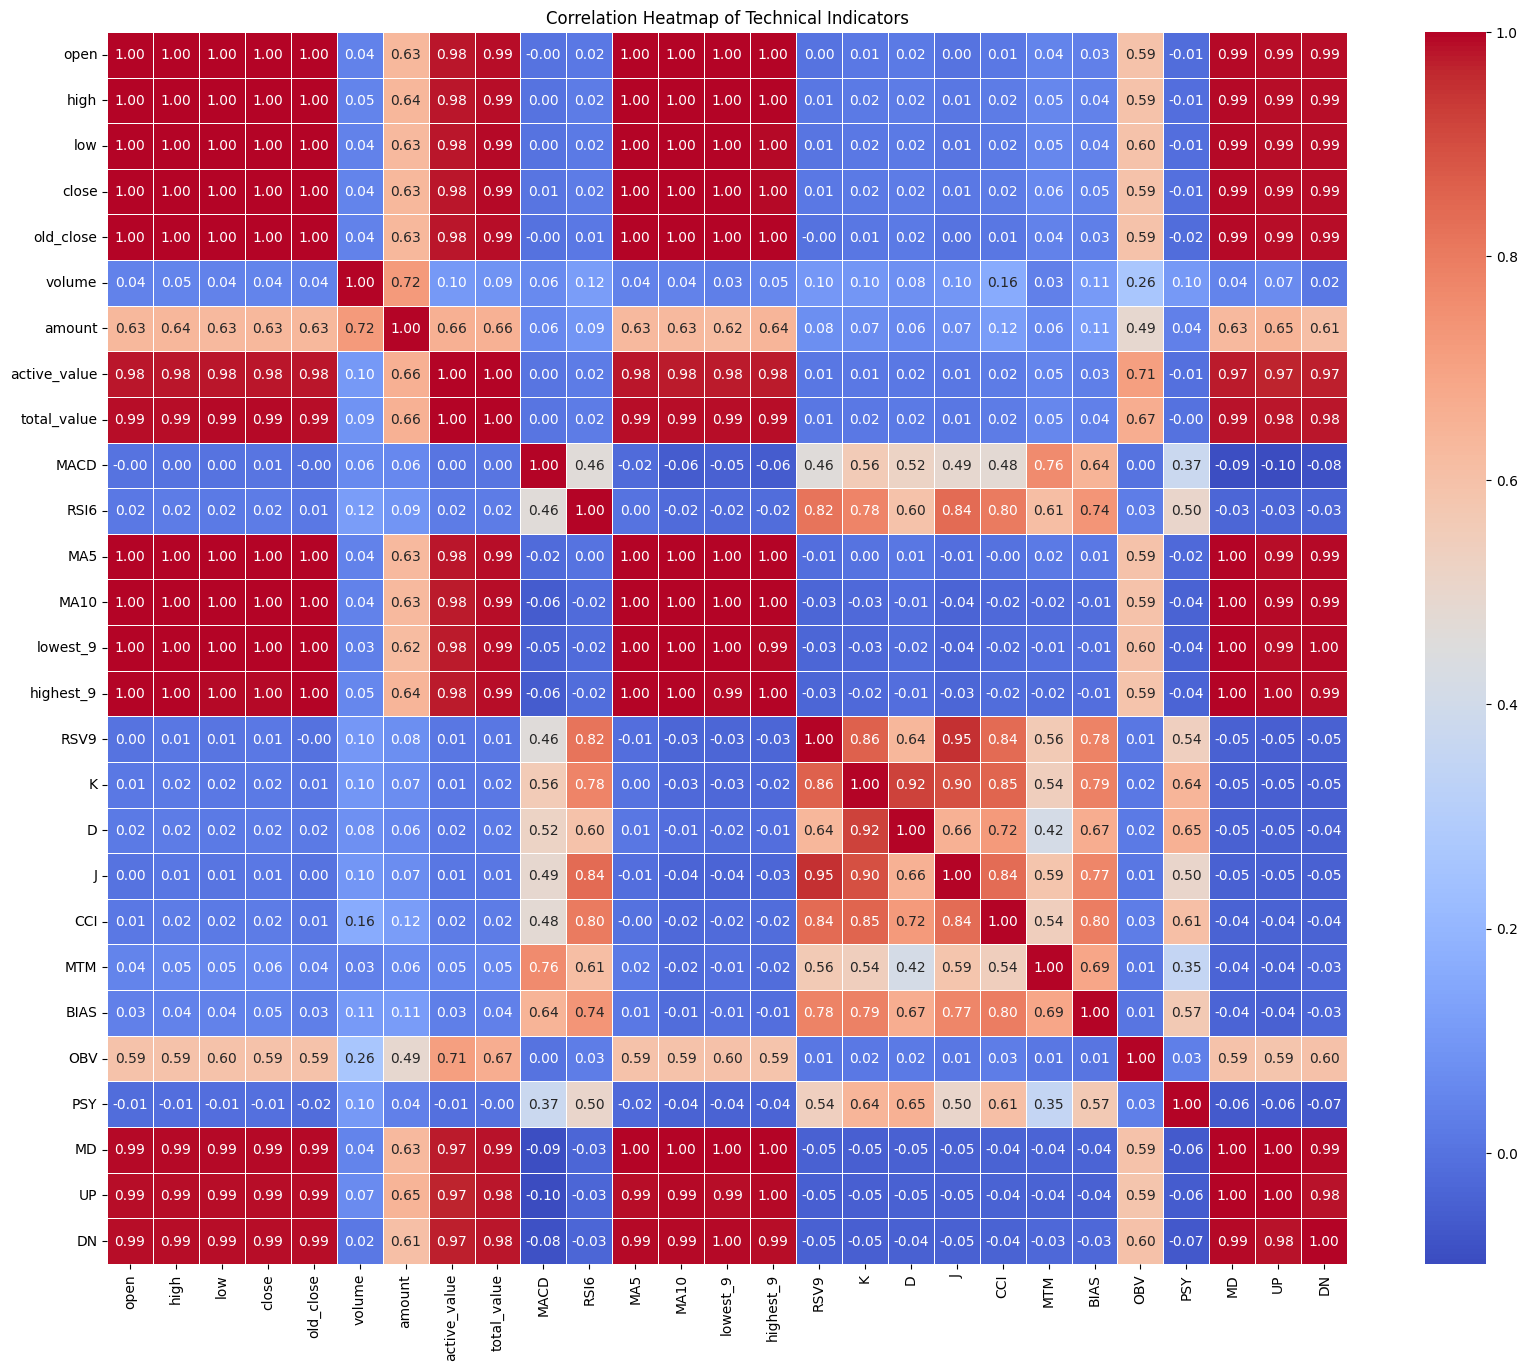

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


# ËÆ°ÁÆóÂêÑÊåáÊ†á‰πãÈó¥ÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞Áü©Èòµ
corr_matrix = df.corr()

# ÁªòÂà∂ÁÉ≠ÂäõÂõæ
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

# Ê∑ªÂä†Ê†áÈ¢ò
plt.title("Correlation Heatmap of Technical Indicators")

# ÊòæÁ§∫ÂõæË°®
plt.show()

## PAC‰∏ªÊàêÂàÜÂàÜÊûê

C:\Users\Saxon\AppData\Local\Temp\ipykernel_17548\2736264009.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PC', y='Eigenvalue', data=components_df, palette="viridis")
C:\Users\Saxon\AppData\Local\Temp\ipykernel_17548\2736264009.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PC', y='Explained Variance Ratio (%)', data=components_df, palette="viridis")


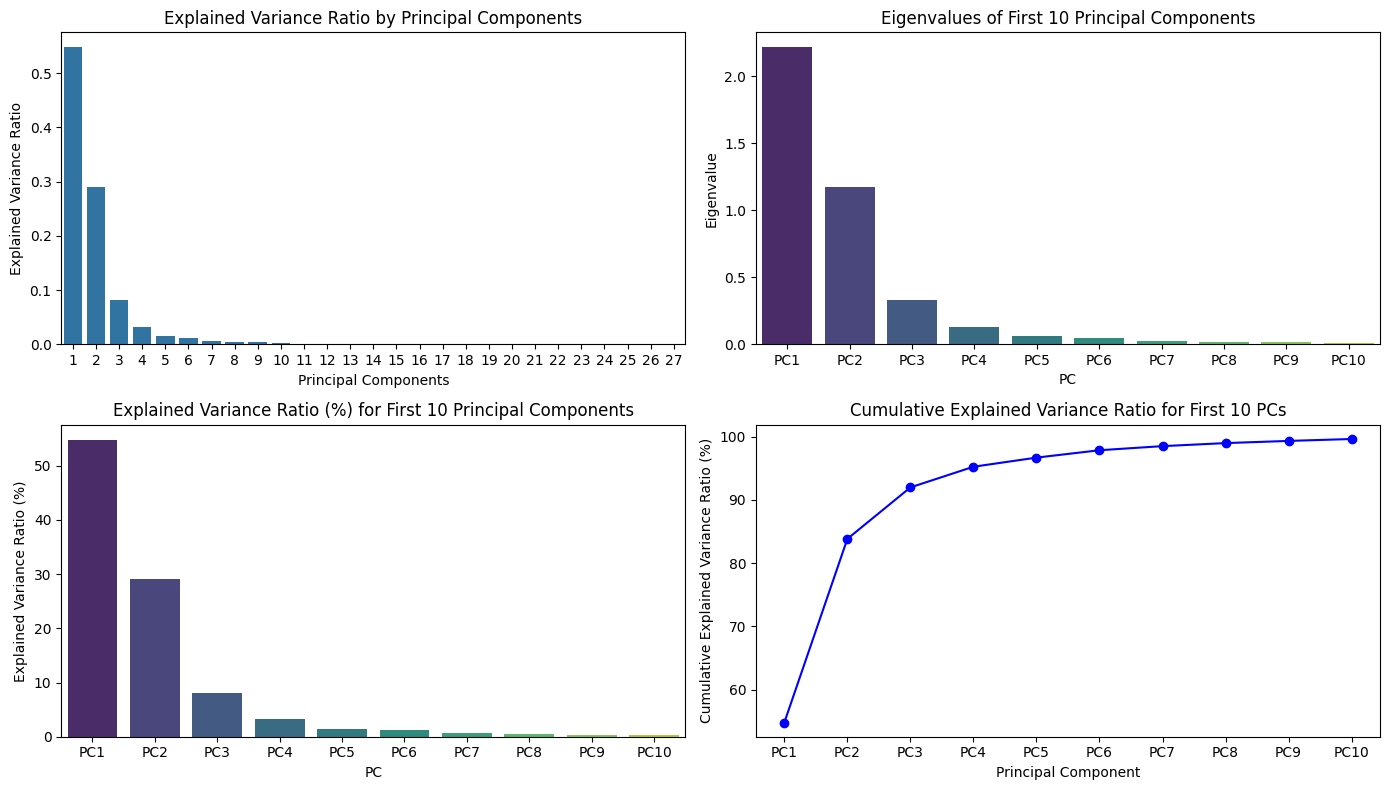

     PC  Eigenvalue  Explained Variance Ratio (%)  \
0   PC1    2.216128                     54.793864   
1   PC2    1.174873                     29.048788   
2   PC3    0.329494                      8.146764   
3   PC4    0.132129                      3.266896   
4   PC5    0.058390                      1.443707   
5   PC6    0.047221                      1.167538   
6   PC7    0.026281                      0.649806   
7   PC8    0.019380                      0.479164   
8   PC9    0.014036                      0.347030   
9  PC10    0.012132                      0.299960   

   Cumulative Explained Variance Ratio (%)  
0                                54.793864  
1                                83.842651  
2                                91.989416  
3                                95.256312  
4                                96.700019  
5                                97.867557  
6                                98.517364  
7                                98.996528  
8          

In [35]:
from sklearn.decomposition import PCA

# ÊâßË°åPCAÈôçÁª¥Ôºå‰øùÁïôÊâÄÊúâ‰∏ªÊàêÂàÜ
pca = PCA()
pca_result = pca.fit_transform(df)

# ÂàõÂª∫PCAÁªìÊûúÁöÑ DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i in range(df.shape[1])])

# ËÆæÁΩÆÂõæË°®Ê†∑Âºè
plt.figure(figsize=(14, 8))

# ÂèØËßÜÂåñÊñπÂ∑ÆË¥°ÁåÆÔºåÂ±ïÁ§∫ÊØè‰∏™‰∏ªÊàêÂàÜÁöÑËß£ÈáäÊñπÂ∑ÆÊØî‰æã
plt.subplot(2, 2, 1)
sns.barplot(x=[f"{i+1}" for i in range(len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')




# Ëé∑ÂèñÁâπÂæÅÂÄºÔºàEigenvaluesÔºâÂíåÊñπÂ∑ÆË¥°ÁåÆÁéá
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# ËÆ°ÁÆóÁ¥ØËÆ°ÊñπÂ∑ÆË¥°ÁåÆÁéá
cumulative_explained_variance = explained_variance_ratio.cumsum()

# ÊèêÂèñÂâç10‰∏™‰∏ªÊàêÂàÜÁöÑÊï∞ÊçÆ
n_components = 10
components_data = {
    'PC': [f'PC{i+1}' for i in range(n_components)],
    'Eigenvalue': explained_variance[:n_components],
    'Explained Variance Ratio (%)': explained_variance_ratio[:n_components] * 100,
    'Cumulative Explained Variance Ratio (%)': cumulative_explained_variance[:n_components] * 100
}

# ÂàõÂª∫DataFrame
components_df = pd.DataFrame(components_data)



# ÁªòÂà∂ÁâπÂæÅÂÄºÊù°ÂΩ¢Âõæ
plt.subplot(2, 2, 2)
sns.barplot(x='PC', y='Eigenvalue', data=components_df, palette="viridis")
plt.title('Eigenvalues of First 10 Principal Components')

# ÁªòÂà∂ÊñπÂ∑ÆË¥°ÁåÆÁéáÊù°ÂΩ¢Âõæ
plt.subplot(2, 2, 3)
sns.barplot(x='PC', y='Explained Variance Ratio (%)', data=components_df, palette="viridis")
plt.title('Explained Variance Ratio (%) for First 10 Principal Components')

# ÁªòÂà∂Á¥ØËÆ°ÊñπÂ∑ÆË¥°ÁåÆÁéáÊäòÁ∫øÂõæ
plt.subplot(2, 2, 4)
plt.plot(components_df['PC'], components_df['Cumulative Explained Variance Ratio (%)'], marker='o', color='b')
plt.title('Cumulative Explained Variance Ratio for First 10 PCs')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio (%)')

# ÈÄÇÈÖçÂ∏ÉÂ±ÄÂπ∂ÊòæÁ§∫ÂõæÂΩ¢
plt.tight_layout()
plt.show()

# ËæìÂá∫Ââç10‰∏ªÊàêÂàÜÁöÑÊï∞ÊçÆ
print(components_df)

          open          high           low         close     old_close  \
PC1   0.242446  2.413670e-01  2.406278e-01  2.415270e-01  2.416016e-01   
PC2  -0.006000 -8.088180e-03 -7.278570e-03 -9.285252e-03 -5.244681e-03   
PC3   0.111073  1.116828e-01  1.089118e-01  1.106660e-01  1.106264e-01   
PC4   0.011535  6.212901e-03  5.719996e-03  1.049032e-03  1.291472e-02   
PC5  -0.005977 -6.820291e-03 -4.726977e-03 -3.292019e-03 -5.713250e-03   
PC6  -0.006972  1.737436e-03 -9.425281e-04  7.206193e-03 -8.825359e-03   
PC7  -0.018522 -2.359147e-03 -2.612691e-02 -1.342591e-02 -1.957084e-02   
PC8  -0.065632 -7.222737e-02 -7.725142e-02 -8.165155e-02 -5.504668e-02   
PC9   0.005098 -5.336467e-03 -8.352867e-03 -1.035755e-02  1.320829e-02   
PC10 -0.012416  8.027750e-03  2.843666e-03  2.988068e-02 -1.440017e-02   
PC11 -0.000917 -4.558403e-03 -5.566767e-03 -2.555395e-03 -7.823620e-03   
PC12 -0.044333 -7.031489e-04 -1.696305e-02  2.221023e-02 -5.924583e-02   
PC13  0.075401  9.691123e-02  6.623874

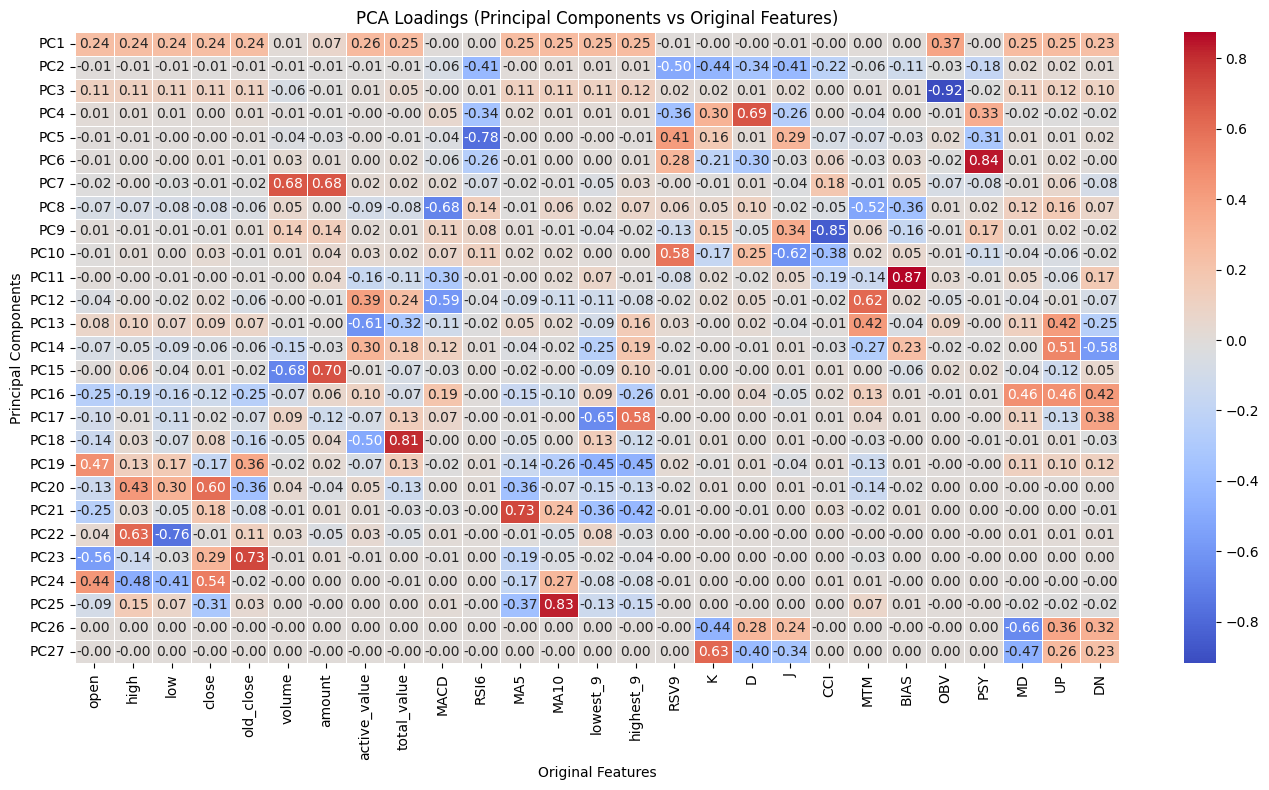

In [36]:
# Ëé∑Âèñ‰∏ªÊàêÂàÜÁöÑËΩΩËç∑Áü©Èòµ
loadings = pca.components_

# Â∞ÜËΩΩËç∑Áü©ÈòµËΩ¨Êç¢‰∏∫DataFrameÔºåÊñπ‰æøÊü•ÁúãÂíåÁêÜËß£
loadings_df = pd.DataFrame(loadings, columns=df.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])

# ÊòæÁ§∫ËΩΩËç∑Áü©Èòµ
print(loadings_df)

# ÂèØËßÜÂåñËΩΩËç∑Áü©Èòµ
plt.figure(figsize=(14, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('PCA Loadings (Principal Components vs Original Features)')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.tight_layout()
plt.show()

## ÂàÜÂâ≤ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ

In [37]:
from copy import deepcopy as dc
import torch

# Ëé∑ÂèñËß£ÈáäÊñπÂ∑ÆÊØî‰æã
explained_variance_ratio = pca.explained_variance_ratio_

# Ëé∑ÂèñÂâç‰∏â‰∏™‰∏ªÊàêÂàÜÔºàÊåâËß£ÈáäÊñπÂ∑ÆÊØî‰æãÈÄâÊã©Ôºâ
top_3_components_indices = explained_variance_ratio.argsort()[-3:][::-1]  # Ëé∑ÂèñËß£ÈáäÊñπÂ∑ÆÊúÄÂ§öÁöÑ3‰∏™‰∏ªÊàêÂàÜÁöÑÁ¥¢Âºï

# ÊèêÂèñÂâç3‰∏™‰∏ªÊàêÂàÜÁöÑÊï∞ÊçÆ
top_3_components = pca_result[:, top_3_components_indices]  # ÈÄâÊã©ÂØπÂ∫îÁöÑ‰∏ªÊàêÂàÜÂàó

# ÂàõÂª∫DataFrame

X = top_3_components

y = df['close'].values


lookback = 10
num_features = 3



print(X.shape, y.shape)

split_index = int(len(X) * 0.8)

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]


# Ëé∑Âèñ X_train Âíå X_test ÁöÑÂ§ßÂ∞è
num_elements_train = X_train.shape[0] * X_train.shape[1]
num_elements_test = X_test.shape[0] * X_test.shape[1]

# ËÆ°ÁÆóË£ÅÂâ™ÂêéÈÄÇÂêà reshape ÁöÑÊúÄÂ§ßÂÖÉÁ¥†Êï∞
train_size = (X_train.shape[0] // lookback) * lookback
test_size = (X_test.shape[0] // lookback) * lookback

X_train = X_train[:train_size]
X_test = X_test[:test_size]


y_train = y_train[:train_size]
y_test = y_test[:test_size]



# ËΩ¨Êç¢‰∏∫Tensor
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()


(6408, 3) (6408,)


## Ê®°ÂûãÊûÑÂª∫

In [ ]:
#ÂØºÂÖ•torchÂ∫ì
import torch.utils.data as data
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
 
 
def train_model_no_attention(X_train, y_train, X_val, y_val):
    #ÂÆö‰πâÊó©ÂÅúÊú∫Âà∂
    class CustomEarlyStopping:
        def __init__(self, patience=10, delta=0, verbose=False):
            self.patience = patience
            self.delta = delta
            self.verbose = verbose
            self.counter = 0
            self.best_score = None
            self.early_stop = False
 
        
        def __call__(self, val_loss):
            score = -val_loss
 
            if self.best_score is None:
                self.best_score = score
 
            elif score < self.best_score + self.delta:
                self.counter += 1
                if self.verbose:
                    print(f'EarlyStopping counter: {self.counter} out of {self.patience}, score: {self.best_score}')
        
                if self.counter >= self.patience:
                    self.early_stop = True
            else:
                self.best_score = score
                self.counter = 0
 
        
    #ÂÆö‰πâÁ•ûÁªèÁΩëÁªúÊ®°Âûã
 
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.conv1 = nn.Conv1d(in_channels=11, out_channels=64, kernel_size=3, padding=1)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
            self.maxpool = nn.MaxPool1d(2)
            self.lstm1 = nn.LSTM(input_size=64, hidden_size=128,batch_first=True)
            self.dropout1 = nn.Dropout(0.2)
            self.bidirectional = nn.LSTM(128, 128, bidirectional=True, batch_first=True)
            self.dropout2 = nn.Dropout(0.2)
            self.dense1 = nn.Linear(128 * 2, 64)  
            self.dense2 = nn.Linear(64, 8)
            self.dense3 = nn.Linear(8, 1)
 
        def forward(self, x):
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = self.maxpool(x.permute(0, 2, 1)) 
            x, _ = self.lstm1(x)
            x = self.dropout1(x)
            x, _ = self.bidirectional(x)
            x = x[:, -1, :]
            x = self.dropout2(x)
            x = F.sigmoid(self.dense1(x))
            x = self.dense2(x)
            x = self.dense3(x)
            return x
 
    #Áî®Êù•ËÆ°ÁÆóÈ™åËØÅÈõÜÁöÑrmse
    def calculate_rmse(model, X, y, criterion):
        with torch.no_grad():
            y_pred = model(X.permute(0, 2, 1)).detach()
            rmse = np.sqrt(criterion(y_pred.cpu(), y.unsqueeze(1).detach()))
        return rmse
 
 
    # ÂàõÂª∫Ê®°ÂûãÂÆû‰æã
    Torchmodel = Net()
 
    # ÂÆö‰πâÊçüÂ§±ÂáΩÊï∞Âíå‰ºòÂåñÂô®ÔºåËøôÁ±ª‰ΩøÁî®ÁöÑÊòØMSEÊçüÂ§±ÂáΩÊï∞ÂíåAdamW‰ºòÂåñÂô®
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(Torchmodel.parameters(), lr=1e-3, weight_decay=1e-5)
 
    # ÂÆö‰πâÂ≠¶‰π†ÁéáË∞ÉÊï¥Âô®
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
 
    # Â∞ÜÊï∞ÊçÆ„ÄÅÊ®°ÂûãÂíåÊçüÂ§±ÂáΩÊï∞ËΩ¨ÁßªÂà∞GPU‰∏ä
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    Torchmodel = Torchmodel.to(device)
    criterion = criterion.to(device)
 
 
    # Ê®°ÂûãÂÆö‰πâÂÆåÊàêÂêéÔºåÂºÄÂßãËÆ≠ÁªÉÊ®°Âûã
    # ÂÆö‰πâËÆ≠ÁªÉÂèÇÊï∞
 
    loader = data.DataLoader(data.TensorDataset(X_train, y_train),
                            batch_size = 10, shuffle = True)
 
    X_val = X_val.to(device)
 
    #ÂàõÂª∫Êó©ÂÅúÊú∫Âà∂ÂÆû‰æã
    early_stopping = CustomEarlyStopping(patience=10, verbose=True)
 
    #Áî®Êù•Â≠òÂÇ®ËÆ≠ÁªÉÂíåÈ™åËØÅÊçüÂ§±
    train_losses = []
    val_losses = []
 
    epochs = 300
    for epoch in range(epochs):
        Torchmodel.train()
        train_loss = 0
        for X_batch, y_batch in loader:
            print(X_batch.shape)
            print(y_batch.shape)
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            y_pred = Torchmodel(X_batch.permute(0, 2, 1))
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            optimizer.zero_grad(set_to_none=True)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()  # Á¥ØÂä†ÊØè‰∏™batchÁöÑÊçüÂ§±
 
        train_loss /= len(loader)  # ËÆ°ÁÆóÂπ≥ÂùáËÆ≠ÁªÉÊçüÂ§±
        train_losses.append(np.sqrt(train_loss))  # ‰øùÂ≠òËÆ≠ÁªÉÊçüÂ§±
 
        Torchmodel.eval()
        
        val_rmse = calculate_rmse(Torchmodel, X_val, y_val, criterion)
        val_losses.append(val_rmse.item())  # ‰øùÂ≠òÈ™åËØÅÊçüÂ§±
 
        scheduler.step(val_rmse)
        
        early_stopping(val_rmse)
        
        # Â∫îÁî®Êó©ÂÅúÊú∫Âà∂ÔºåÁ°ÆÂÆöÊòØÂê¶ÂÅúÊ≠¢ËÆ≠ÁªÉ
        if early_stopping.early_stop:
            print("Early stopping")
            break
            
        if epoch % 10 == 0:
            print('*'*10, 'Epoch: ', epoch, '\ train RMSE: ', np.sqrt(train_loss), '\ val RMSE', val_rmse.item())
    
    return Torchmodel, train_losses, val_losses



Torchmodel, train_losses, val_losses= train_model_no_attention(X_train, y_train, X_test, X_test)
 
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 2 is not equal to len(dims) = 3

swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the net

In [ ]:
# import torch.nn as nn
# import torch.nn.functional as F

# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv1d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
#         self.maxpool = nn.MaxPool1d(2)
#         self.lstm1 = nn.LSTM(input_size=64, hidden_size=128,batch_first=True)
#         self.dropout1 = nn.Dropout(0.2)
#         self.bidirectional = nn.LSTM(128, 128, bidirectional=True, batch_first=True)
#         self.dropout2 = nn.Dropout(0.2)
#         self.dense1 = nn.Linear(128 * 2, 64)  
#         self.dense2 = nn.Linear(64, 8)
#         self.dense3 = nn.Linear(8, 1)

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         x = F.relu(self.conv2(x))
#         x = self.maxpool(x.permute(0, 2, 1)) 
#         x, _ = self.lstm1(x)
#         x = self.dropout1(x)
#         x, _ = self.bidirectional(x)
#         x = x[:, -1, :]
#         x = self.dropout2(x)
#         x = F.sigmoid(self.dense1(x))
#         x = self.dense2(x)
#         x = self.dense3(x)
#         return x

In [ ]:
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import matplotlib.pyplot as plt
# import swanlab
# from copy import deepcopy as dc
# import numpy as np
# import os
# from torch.utils.data import Dataset

# # ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã
# def save_best_model(model, config, epoch):
#     if not os.path.exists(config.save_path):
#         os.makedirs(config.save_path)
#     torch.save(model.state_dict(), os.path.join(config.save_path, 'best_model.pth'))
#     print(f'Val Epoch: {epoch} - Best model saved at {config.save_path}')

# # ËÆ≠ÁªÉÂáΩÊï∞
# def train(model, X_train, y_train, optimizer, criterion, scheduler):
#     running_loss = 0
#     # ËÆ≠ÁªÉ
#     for i in range(len(X_train)-3):
#         x_sample = X_train[i:i+3, :]
#         y_sample = y_train[i:i+3]
#         x_sample, y_sample = x_sample.to(device), y_sample.to(device)
#         print(x_sample)
#         y_pred = model(x_sample)  # Ê∑ªÂä†ÊâπÈáèÁª¥Â∫¶
        
#         loss = criterion(y_pred, y_sample.unsqueeze(0))  # Ê∑ªÂä†ÊâπÈáèÁª¥Â∫¶
#         running_loss += loss.item()
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     scheduler.step()
#     avg_loss_epoch = running_loss / len(X_train)
#     print(f'Epoch: {epoch}, Avg. Loss: {avg_loss_epoch}')
#     swanlab.log({"train/loss": running_loss}, step=epoch)

# # È™åËØÅÂáΩÊï∞
# def validate(model, config, X_test, y_test, criterion, epoch, best_loss=None):
#     model.eval()
#     val_loss = 0
#     with torch.no_grad():
#         for i in range(len(X_test)):
#             x_sample = X_test[i]
#             y_sample = y_test[i]
#             x_sample, y_sample = x_sample.to(device), y_sample.to(device)
#             y_pred = model(x_sample)
#             loss = criterion(y_pred, y_sample)
#             val_loss += loss.item()
        
#         avg_val_loss = val_loss / len(X_test)
#         print(f'Epoch: {epoch}, Validation Loss: {avg_val_loss}')
#         swanlab.log({"val/loss": avg_val_loss}, step=epoch)
    
#     if epoch == 1:
#         best_loss = avg_val_loss
    
#     # ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã
#     if avg_val_loss < best_loss:
#         best_loss = avg_val_loss
#         save_best_model(model, config, epoch)
    
#     return best_loss

# # ÂèØËßÜÂåñÈ¢ÑÊµãÁªìÊûú
# def visualize_predictions(train_predictions, val_predictions, scaler, X_train, X_test, y_train, y_test, lookback):
#     train_predictions = train_predictions.flatten()
#     val_predictions = val_predictions.flatten()

#     dummies = np.zeros((X_train.shape[0], lookback+1))
#     dummies[:,0] = train_predictions
#     dummies = scaler.inverse_transform(dummies)
#     train_predictions = dc(dummies[:,0])

#     dummies = np.zeros((X_test.shape[0], lookback+1))
#     dummies[:,0] = val_predictions
#     dummies = scaler.inverse_transform(dummies)
#     val_predictions = dc(dummies[:,0])

#     dummies = np.zeros((X_train.shape[0], lookback+1))
#     dummies[:,0] = y_train.flatten()
#     dummies = scaler.inverse_transform(dummies)
#     new_y_train = dc(dummies[:,0])

#     dummies = np.zeros((X_test.shape[0], lookback+1))
#     dummies[:,0] = y_test.flatten()
#     dummies = scaler.inverse_transform(dummies)
#     new_y_test = dc(dummies[:,0])

#     # ËÆ≠ÁªÉÈõÜÈ¢ÑÊµãÁªìÊûúÂèØËßÜÂåñ
#     plt.figure(figsize=(10, 6))
#     plt.plot(new_y_train, color='red', label='Actual Train Close Price')
#     plt.plot(train_predictions, color='blue', label='Predicted Train Close Price', alpha=0.5)
#     plt.xlabel('Date')
#     plt.ylabel('Close Price')
#     plt.title('(TrainSet) Google Stock Price Prediction with LSTM')
#     plt.legend()

#     plt_image = []
#     plt_image.append(swanlab.Image(plt, caption="TrainSet Price Prediction"))   

#     # ÊµãËØïÈõÜÈ¢ÑÊµãÁªìÊûúÂèØËßÜÂåñ
#     plt.figure(figsize=(10, 6))
#     plt.plot(new_y_test, color='red', label='Actual Test Close Price')
#     plt.plot(val_predictions, color='blue', label='Predicted Test Close Price', alpha=0.5)
#     plt.xlabel('Date')
#     plt.ylabel('Close Price')
#     plt.title('(TestSet) Google Stock Price Prediction with LSTM')
#     plt.legend()

#     plt_image.append(swanlab.Image(plt, caption="TestSet Price Prediction"))

#     swanlab.log({"Prediction": plt_image})

In [ ]:
# # ÂàùÂßãÂåñSwanLabÂÆûÈ™å
# swanlab.login(api_key="WY1PorH8FZgejK6yyTFIV")
# swanlab.init(
#     project='Google-Stock-Prediction',
#     experiment_name="CNN-LSTM",
#     description="Âü∫‰∫éCNN-LSTMÊ®°ÂûãÂØπGoogleËÇ°Á•®‰ª∑Ê†ºÊï∞ÊçÆÈõÜÁöÑËÆ≠ÁªÉ‰∏éÊé®ÁêÜ",
#     config={ 
#         "learning_rate": 4e-3,
#         "epochs": 50,
        
#         "lookback": 60,
#         "trainset_ratio": 0.95, 
#         "save_path": f'./checkpoint/{pd.Timestamp.now()}',
#         "optimizer": "AdamW",
#     },
# )

# config = swanlab.config
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # ------------------- ÂÆö‰πâÊï∞ÊçÆÈõÜ -------------------
# # train_dataset, test_dataset, scaler, X_train, X_test, y_train, y_test = get_stock_dataset('./GOOG.csv', config)


# # ------------------- ÂÆö‰πâÊ®°Âûã„ÄÅË∂ÖÂèÇÊï∞ -------------------
# model = Net()
# print(model)  # ÊâìÂç∞Ê®°ÂûãÁªìÊûÑ

# model = model.to(device)
# optimizer = optim.AdamW(model.parameters(), lr=config.learning_rate)
# criterion = nn.MSELoss()

# # ------------------- ÂÆö‰πâÂ≠¶‰π†ÁéáË°∞ÂáèÁ≠ñÁï• -------------------
# def lr_lambda(epoch):
#     total_epochs = config.epochs
#     start_lr = config.learning_rate
#     end_lr = start_lr * 0.01
#     update_lr = ((total_epochs - epoch) / total_epochs) * (start_lr - end_lr) + end_lr
#     return update_lr * (1 / config.learning_rate)

# scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

# # ------------------- ËÆ≠ÁªÉ‰∏éÈ™åËØÅ -------------------
# for epoch in range(1, config.epochs+1):
#     model.train()
#     swanlab.log({"train/lr": scheduler.get_last_lr()[0]}, step=epoch)
#     train(model, X_train, y_train, optimizer, criterion, scheduler)
    
#     if epoch == 1: best_loss = None
#     best_loss = validate(model,config, X_test, y_test, criterion, epoch, best_loss=best_loss)
    
# # ------------------- ‰ΩøÁî®ÊúÄ‰Ω≥Ê®°ÂûãÊé®ÁêÜÔºå‰∏éÁîüÊàêÂèØËßÜÂåñÁªìÊûú -------------------
# with torch.no_grad():
#     # Âä†ËΩΩÊúÄ‰Ω≥Ê®°Âûã
#     best_model_path = os.path.join(config.save_path, 'best_model.pth')
#     model.load_state_dict(torch.load(best_model_path))
#     model.eval()
#     train_predictions = model(X_train.to(device)).to('cpu').numpy()
#     val_predictions = model(X_test.to(device)).to('cpu').numpy()
#     # ÂèØËßÜÂåñÈ¢ÑÊµãÁªìÊûú
#     visualize_predictions(train_predictions, val_predictions, scaler, X_train, X_test, y_train, y_test, config.lookback)

swanlab: Tracking run with swanlab version 0.4.9                                   
swanlab: Run data will be saved locally in d:\xianyu\cnnlstm\code\swanlog\run-20250228_223313-b0a8d690
swanlab: üëã Hi 2050836088, welcome to swanlab!
swanlab: Syncing run CNN-LSTM to the cloud
swanlab: üåü Run `swanlab watch d:\xianyu\cnnlstm\code\swanlog` to view SwanLab Experiment Dashboard locally
swanlab: üè† View project at https://swanlab.cn/@2050836088/Google-Stock-Prediction
swanlab: üöÄ View run at https://swanlab.cn/@2050836088/Google-Stock-Prediction/runs/f7l75u4ed7i9b4mggl4zq


Net(
  (conv1): Conv1d(3, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (maxpool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lstm1): LSTM(64, 128, batch_first=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (bidirectional): LSTM(128, 128, batch_first=True, bidirectional=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (dense1): Linear(in_features=256, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=8, bias=True)
  (dense3): Linear(in_features=8, out_features=1, bias=True)
)
tensor([[-1.3477,  1.2556,  0.4670],
        [-1.3474,  1.6823,  0.4506],
        [-1.3571,  0.9592,  0.4684]], device='cuda:0')


RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 2 is not equal to len(dims) = 3

swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the network improves
swanlab: network error, swanlab will resume uploads when the net